In [5]:
from globalConstants import *
import dynamiqs as dq
import jax
import jax.numpy as jnp # the JAX version of numpy
from matplotlib import pyplot as plt

|██████████| 100.0% ◆ elapsed 536.47ms ◆ remaining 0.00ms  
100%|██████████| 600/600 [00:23<00:00, 25.13it/s]


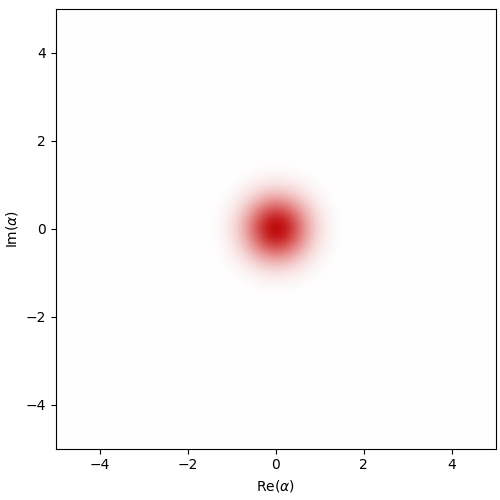

In [12]:
Hbuff = g2 * dq.dag(a) @ dq.dag(a) @ b  + jnp.conj(g2) * a @ a @ dq.dag(b) + jnp.conj(eps) * b + eps * dq.dag(b)
# Modelling our buffer interaction hamiltonian
jump_ops = [jnp.sqrt(Kb)*b] # jump operators
exp_ops = [dq.dag(a) @ a] # expectation operators
res = dq.mesolve(Hbuff,jump_ops, psi0, t_save, exp_ops=exp_ops) # solve the master equation

trace_a = dq.ptrace(res.states, 0,res.states.dims) # partial trace over b

dq.plot.wigner_gif(trace_a, fps=120) # plot the Wigner function of the partial trace


In [9]:


numOp = dq.tensor(dq.number(na), dq.eye(nb))
# We have to operate in a composite hilbert space so we need to tensor 
# everything together



# Create a diagonal matrix from the parity vector.
parity_diag_matrix = parity(na)


# to a Qarray.

# expectation value of the photons, we only
# want to apply the pairity operator to elements 
# inside the resonator space, so we tensor it
# against identity in Ib




/var/folders/ch/4w1x88c120g72bpx7rj47ktw0000gn/T/ipykernel_1849/1200739366.py:4: UserWarning: Explicitly requested dtype <class 'jax.numpy.complex128'> requested in array is not available, and will be truncated to dtype complex64. To enable more dtypes, set the jax_enable_x64 configuration option or the JAX_ENABLE_X64 shell environment variable. See https://github.com/jax-ml/jax#current-gotchas for more.
  diag = jnp.array([(-1)**i for i in range(n)], dtype=jnp.complex128)


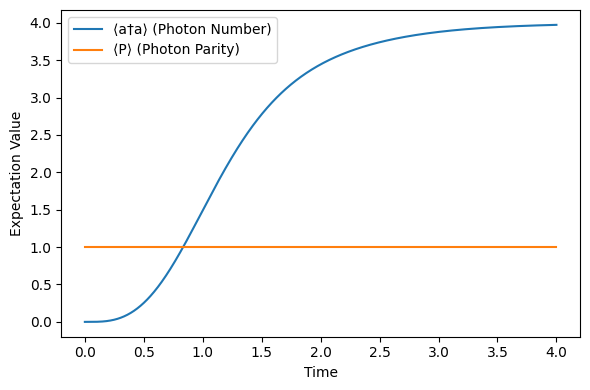

In [10]:
num_expect = []
parity_expect = []

for state in res.states:
    # Loop through all the possible states
    # and find our expectation value 
    # through different operators.
    # the number operator corresponds to
    # the number of photons. The pairity
    # operator corresponds to the flux
    # of the circuit
    num_val = dq.expect(numOp, state).real  
    # <state|num|state>
    parity_val = dq.expect(PaOp, state).real  
    # <PaOp|num|PaOp>
    num_expect.append(num_val)
    parity_expect.append(parity_val)

num_expect = jnp.array(num_expect)
parity_expect = jnp.array(parity_expect)

# Now plot the observables versus time (assuming t_save is your array of times):

plt.figure(figsize=(6,4))
plt.plot(t_save, num_expect, label="⟨a†a⟩ (Photon Number)")
plt.plot(t_save, parity_expect, label="⟨P⟩ (Photon Parity)")
plt.xlabel("Time")
plt.ylabel("Expectation Value")
plt.legend()
plt.tight_layout()
plt.show()

This graph above does make sense, as it's essentially saying the number of photons evolves to 4 as a function of time.

In [11]:
psi0.shape

(100, 1)